<a href="https://colab.research.google.com/github/Dzy00/CHL5230-Final-Project/blob/main/CHL5230_Final_Project_CHANGE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

*   C CHANGE dataset
*   Visualizations

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(976147, 70)
Index(['Patient_ID', 'Sex', 'Age', 'BirthYear', 'BMI', 'Obese', 'Height',
       'Weight', 'WaistCircumference', 'sBP', 'dBP', 'FBS', 'HDL', 'LDL',
       'LDL_CVD Risk', 'LDL-CVDRisk-Statin', 'TC_Age_Sex', 'TC', 'TG', 'INR',
       'DM_HbA1c', 'DM_A1c<6.6', 'HBA1C', 'Any_AntiHTN', 'Any_AntiHTN-HTN',
       'ACE+ARB', 'ACE-or-ARB', 'MI+BB+ACE-or-ARB', 'MI+BB', 'HTN+CAD',
       'HTN+CAD+ACE-or-ARB', 'Diuretic_usage', 'Antihypertensive_usage',
       'Statin_usage', 'DM_Statin', 'DM_ACE/ARB', 'CCB_usage',
       'Thiazide_usage', 'ACEI_usage', 'ARB_usage', 'AlphaBlocker_usage',
       'DihydropyridineCCB_usage', 'Warfarin_usage', 'Antiplatelet_usage',
       'DipyridamoleER_usage', 'Clopidogrel_usage', 'BetaBlocker_usage',
       'Antihyper_Peripher_usage', 'Antihyperglycemics_usage', 'ASA_usage',
       'HeartFailure_Hx', 'AtrialFibrillation_Hx', 'TIA_Hx', 'Dyslipidemia_Hx',
       'BP>160_Macrovasc', 'MacroVasc', 'DM_Macrovasc', 'DM-sBP<130',
       'DM-dBP<80', 'MI_Hx', 

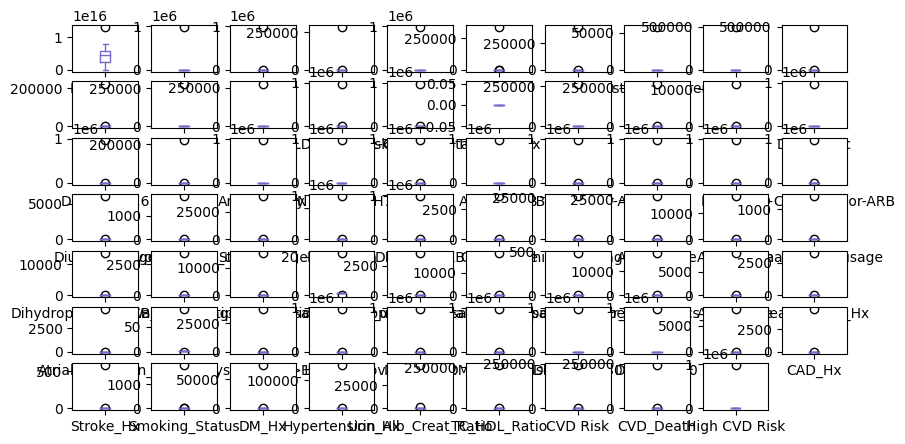

Patient_ID                   0
Sex                        775
Age                          0
BirthYear                    0
BMI                     695019
                         ...  
Urin_Alb_Creat_Ratio    928945
TC_HDL_Ratio            715426
CVD Risk                734730
CVD_Death               734730
High CVD Risk                0
Length: 70, dtype: int64
974320


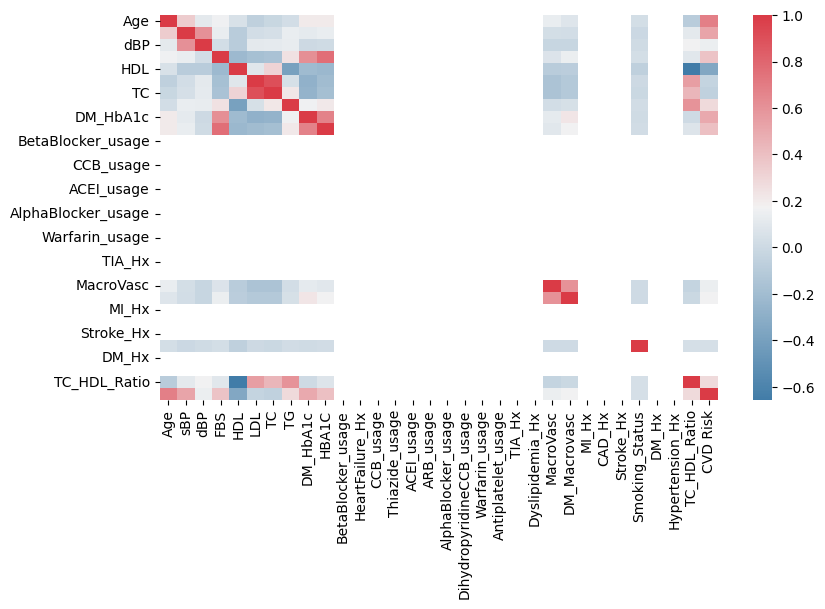

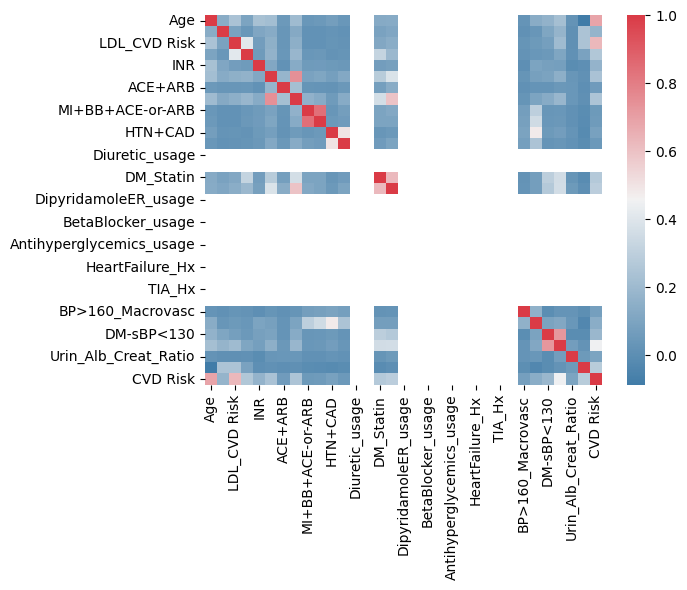

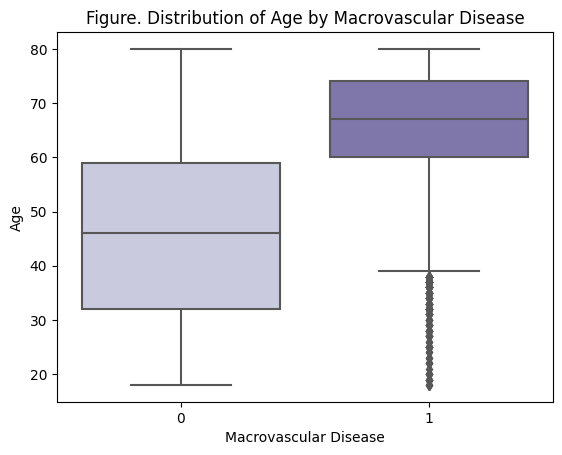

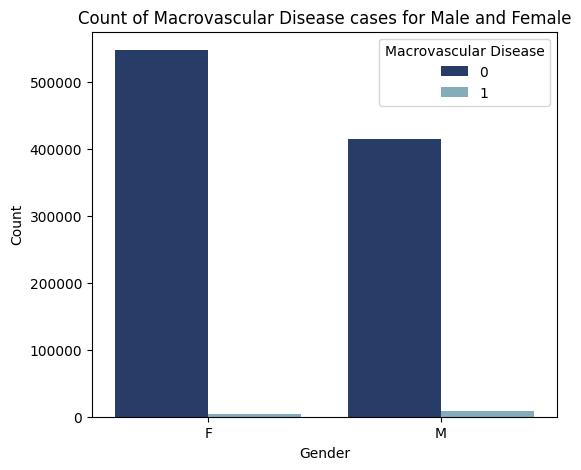

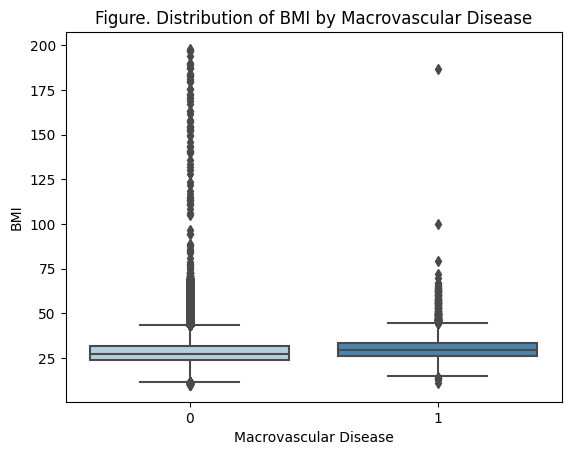

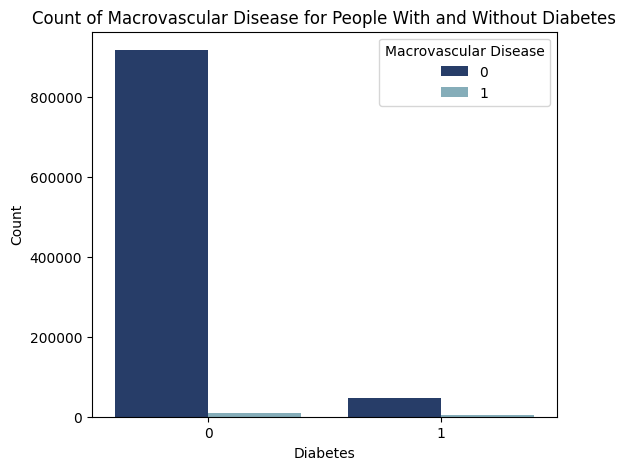

<Figure size 600x500 with 0 Axes>

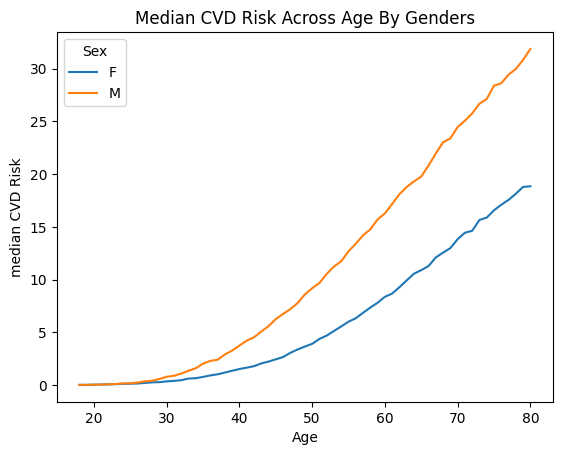

[Text(0.5, 1.0, 'Frequency Distribution of CVD Risk'),
 Text(0, 0.5, 'Frequency')]

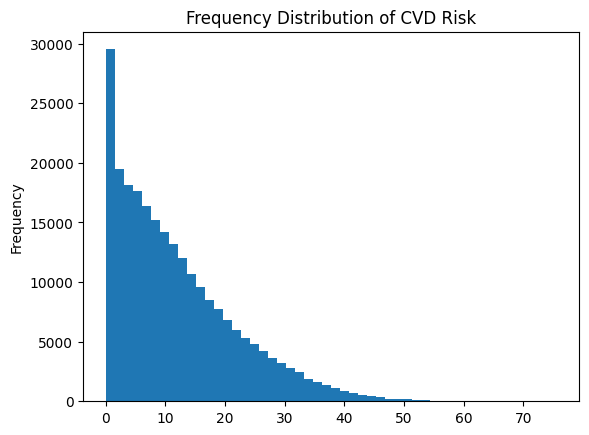

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# read dataset
CHANGE_df = pd.read_excel('C CHANGE Analysis Data.xlsx')
CHANGE_df.head()

# check dimension of the dataset
print(CHANGE_df.shape)

# list the columns of the dataframe
print(CHANGE_df.columns)

# summary statistics
description = CHANGE_df.describe()
description
description.plot(kind='box', subplots=True, layout=(7, 10), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

# check missing value
print(CHANGE_df.isnull().sum())

# exploration
CHANGE_df['High CVD Risk'].unique()
CHANGE_df['TC_Age_Sex'].unique() # completely NA
print(CHANGE_df['Antihypertensive_usage'].isnull().sum())

# median age, BMI, Waist Circumference by group
CHANGE_df.groupby(['MacroVasc'])['Age','BMI','WaistCircumference'].median()

# median blood pressure, blood sugar, cholesterol etc by group
CHANGE_df.groupby(['MacroVasc'])['sBP','dBP','FBS','HDL','LDL','TC','TG','Urin_Alb_Creat_Ratio','TC_HDL_Ratio'].median()


########################################################### visualization

plt.figure(figsize=(9,5))

# correlation matrix between selected variables
CHANGE_corr_Fram = CHANGE_df[['Sex', 'Age', 'sBP', 'dBP', 'FBS', 'HDL', 'LDL', 'TC', 'TG',
       'DM_HbA1c', 'HBA1C', 'BetaBlocker_usage', 'HeartFailure_Hx', 'CCB_usage',
       'Thiazide_usage', 'ACEI_usage', 'ARB_usage', 'AlphaBlocker_usage',
       'DihydropyridineCCB_usage', 'Warfarin_usage', 'Antiplatelet_usage',
       'TIA_Hx', 'Dyslipidemia_Hx', 'MacroVasc', 'DM_Macrovasc', 'MI_Hx', 'CAD_Hx', 'Stroke_Hx',
       'Smoking_Status', 'DM_Hx', 'Hypertension_Hx', 'TC_HDL_Ratio', 'CVD Risk']]
CHANGE_corr_other = CHANGE_df[['Sex', 'Age', 'BMI', 'LDL_CVD Risk', 'LDL-CVDRisk-Statin', 'INR',
       'Any_AntiHTN-HTN', 'ACE+ARB', 'ACE-or-ARB', 'MI+BB+ACE-or-ARB', 'MI+BB', 'HTN+CAD',
       'HTN+CAD+ACE-or-ARB', 'Diuretic_usage', 'Statin_usage', 'DM_Statin', 'DM_ACE/ARB',
       'DipyridamoleER_usage', 'Clopidogrel_usage', 'BetaBlocker_usage', 'Antihyper_Peripher_usage',
       'Antihyperglycemics_usage', 'ASA_usage', 'HeartFailure_Hx', 'AtrialFibrillation_Hx', 'TIA_Hx',
       'Dyslipidemia_Hx', 'BP>160_Macrovasc', 'MacroVasc',  'DM-sBP<130', 'DM-dBP<80',
       'Urin_Alb_Creat_Ratio', 'TC_HDL_Ratio', 'CVD Risk']]
Mcorr = CHANGE_corr_Fram.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(Mcorr, annot=False, cmap=cmap)
plt.show()

Mcorr = CHANGE_corr_other.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(Mcorr, annot=False, cmap=cmap)
plt.show()

# age
sns.boxplot( x=CHANGE_df['MacroVasc'], y=CHANGE_df['Age'], palette="Purples")
plt.title('Figure. Distribution of Age by Macrovascular Disease')
plt.xlabel('Macrovascular Disease')
plt.ylabel('Age')
plt.show()

# gender
# grouped bar chart using seaborn's countplot function
plt.figure(figsize=(6, 5))
sns.countplot(data=CHANGE_df, x='Sex', hue='MacroVasc', palette=['#1c3a73', '#7cb1c2'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Macrovascular Disease cases for Male and Female')
plt.legend(title='Macrovascular Disease')
plt.show()

# BMI
sns.boxplot( x=CHANGE_df['MacroVasc'], y=CHANGE_df['BMI'], palette="Blues")
plt.title('Figure. Distribution of BMI by Macrovascular Disease')
plt.xlabel('Macrovascular Disease')
plt.ylabel('BMI')
plt.show()

# diabetes
# grouped bar chart
plt.figure(figsize=(6, 5))
sns.countplot(data=CHANGE_df, x='DM_HbA1c', hue='MacroVasc', palette=['#1c3a73', '#7cb1c2'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Count of Macrovascular Disease for People With and Without Diabetes')
plt.legend(title='Macrovascular Disease')
plt.show()


# distribution of the class MacroVasc
import plotly.express as px
counts = CHANGE_df['MacroVasc'].value_counts()
# Define color sequence
colors = ['#1c3a73', '#7cb1c2']
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Classes in Macrovascular Disease Column',
    color_discrete_sequence=colors  # apply colors
)
fig.show()

# plot median CVD Risk over age by gender groups
# create pivot table
meian_CVDRisk = CHANGE_df.pivot_table(index='Age', columns='Sex', values='CVD Risk', aggfunc='median')
# plot
plt.figure(figsize=(6, 5))
meian_CVDRisk.plot(kind='line')
plt.ylabel('median CVD Risk')
plt.title('Median CVD Risk Across Age By Genders')
plt.show()

# distribution of CVD risk
plt.hist(CHANGE_df['CVD Risk'], bins=50)
plt.gca().set(title='Frequency Distribution of CVD Risk', ylabel='Frequency')

In [1]:
# table one: baseline patient characteristics
!pip install tableone
from tableone import TableOne
T1_columns = ['Sex','Age','BMI','WaistCircumference','sBP','dBP','HDL','TC','TG','HBA1C',
              'Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Smoking_Status',
              'Urin_Alb_Creat_Ratio','Hypertension_Hx','CVD Risk','High CVD Risk']
T1_categorical = ['Sex','Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Hypertension_Hx','Smoking_Status',
                  'High CVD Risk']
T1_group_by = ['MacroVasc']
Tableone = TableOne(data=CHANGE_df, columns=T1_columns, categorical=T1_categorical, groupby=T1_group_by, pval=True)
print(Tableone.tabulate(tablefmt = "fancy_grid"))

labels={'MacroVasc': 'MacroVascular Disease'}
# group by MacroVasc, 0 column: non MacroVasc disease, 1: has


NameError: ignored


---
## Data Cleaning (Deal with N/A)

In [3]:
########################################################## clean dataset
# dealing with Missing Value
# selected variables are stored in dataframe CHANGE_selected
CHANGE_selected = CHANGE_df[['Sex','Age','BMI','sBP','dBP','HDL','TC','TG','HBA1C',
              'Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','MacroVasc','Smoking_Status',
              'Urin_Alb_Creat_Ratio','Hypertension_Hx']]

# transform Sex column
CHANGE_selected['Sex'].replace({'F' : 1, 'M' : 0}, inplace=True)
# drop rows with NA in sex
CHANGE_selected = CHANGE_selected.dropna(subset=['Sex'])

# imputation
# impute NA in categorical variables with 0
CHANGE_selected['HeartFailure_Hx'].fillna(0, inplace=True)
CHANGE_selected['AtrialFibrillation_Hx'].fillna(0, inplace=True)
CHANGE_selected['Smoking_Status'].fillna(0.0, inplace=True)
CHANGE_selected['Hypertension_Hx'].fillna(0.0, inplace=True)

## OPTION 1
# delete rows with NA in BMI, sBP, dBP, HDL, HBA1C, TC, TG
CHANGE_noNA = CHANGE_selected.dropna(subset=['BMI','sBP','dBP','HDL','HBA1C','TC','TG','Urin_Alb_Creat_Ratio'], how='any')
CHANGE_noNA['MacroVasc'].sum() # check number of rows with macrovascualr disease

# transform the HBA1C column to 1 for HBA1C>=6.5, 0 for HBA1C<6.5
def funDiabetes(row):
    if row['HBA1C'] < 6.5:
        return 0
    else:
        return 1
CHANGE_noNA['diabetes'] = CHANGE_noNA.apply(funDiabetes, axis=1)
# drop HBA1C
CHANGE_noNA = CHANGE_noNA.drop(columns=['HBA1C'])

# Calculate the percentage of rows with one or more missing values
# percentage_missing_rows = (CHANGE_selected.isnull().sum(axis=1) > 0).sum() / len(CHANGE_selected)
# percentage_missing_rows

# table one of cleaned dataset
T1_columns = ['Sex','Age','BMI','sBP','dBP','HDL','TC','TG','diabetes',
              'Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Smoking_Status',
              'Urin_Alb_Creat_Ratio','Hypertension_Hx']
T1_categorical = ['Sex','Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Hypertension_Hx','Smoking_Status','diabetes']
T1_group_by = ['MacroVasc']
Tableone = TableOne(data=CHANGE_noNA, columns=T1_columns, categorical=T1_categorical, groupby=T1_group_by, pval=True)
print(Tableone.tabulate(tablefmt = "fancy_grid"))

╒═════════════════════════════════╤═════╤═══════════╤══════════════╤══════════════╤══════════════╤═══════════╕
│                                 │     │ Missing   │ Overall      │ 0            │ 1            │ P-Value   │
╞═════════════════════════════════╪═════╪═══════════╪══════════════╪══════════════╪══════════════╪═══════════╡
│ n                               │     │           │ 21787        │ 20476        │ 1311         │           │
├─────────────────────────────────┼─────┼───────────┼──────────────┼──────────────┼──────────────┼───────────┤
│ Sex, n (%)                      │ 0.0 │ 0         │ 11563 (53.1) │ 10596 (51.7) │ 967 (73.8)   │ <0.001    │
├─────────────────────────────────┼─────┼───────────┼──────────────┼──────────────┼──────────────┼───────────┤
│                                 │ 1.0 │           │ 10224 (46.9) │ 9880 (48.3)  │ 344 (26.2)   │           │
├─────────────────────────────────┼─────┼───────────┼──────────────┼──────────────┼──────────────┼───────────┤
│

In [4]:
## OPTION 2
# impute continuous variables with median
cols = ['BMI','sBP','dBP','HDL','HBA1C','TC','TG','Urin_Alb_Creat_Ratio']
CHANGE_medianImpute = CHANGE_selected.fillna(CHANGE_selected[cols].median())

# transform the HBA1C column to 1 for HBA1C>=6.5, 0 for HBA1C<6.5
def funDiabetes(row):
    if row['HBA1C'] < 6.5:
        return 0
    else:
        return 1
CHANGE_medianImpute['diabetes'] = CHANGE_medianImpute.apply(funDiabetes, axis=1)
# drop HBA1C
CHANGE_medianImpute = CHANGE_medianImpute.drop(columns=['HBA1C'])

# table one of cleaned dataset
T1_columns = ['Sex','Age','BMI','sBP','dBP','HDL','TC','TG','diabetes',
              'Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Smoking_Status',
              'Urin_Alb_Creat_Ratio','Hypertension_Hx']
T1_categorical = ['Sex','Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Hypertension_Hx','Smoking_Status','diabetes']
T1_group_by = ['MacroVasc']
Tableone = TableOne(data=CHANGE_medianImpute, columns=T1_columns, categorical=T1_categorical, groupby=T1_group_by, pval=True)
print(Tableone.tabulate(tablefmt = "fancy_grid"))

╒═════════════════════════════════╤═════╤═══════════╤═══════════════╤═══════════════╤══════════════╤═══════════╕
│                                 │     │ Missing   │ Overall       │ 0             │ 1            │ P-Value   │
╞═════════════════════════════════╪═════╪═══════════╪═══════════════╪═══════════════╪══════════════╪═══════════╡
│ n                               │     │           │ 975372        │ 962781        │ 12591        │           │
├─────────────────────────────────┼─────┼───────────┼───────────────┼───────────────┼──────────────┼───────────┤
│ Sex, n (%)                      │ 0.0 │ 0         │ 423842 (43.5) │ 415026 (43.1) │ 8816 (70.0)  │ <0.001    │
├─────────────────────────────────┼─────┼───────────┼───────────────┼───────────────┼──────────────┼───────────┤
│                                 │ 1.0 │           │ 551530 (56.5) │ 547755 (56.9) │ 3775 (30.0)  │           │
├─────────────────────────────────┼─────┼───────────┼───────────────┼───────────────┼───────────

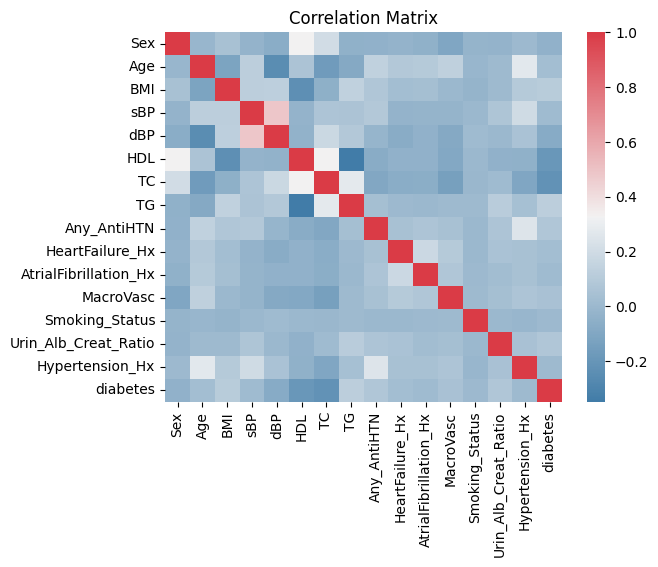

In [7]:
# cleaned dataset name
# median imputer: CHANGE_medianImpute
# delete NA: CHANGE_noNA

# correlation plot on cleaned dataset
plt.title('Correlation Matrix')
Mcorr = CHANGE_noNA.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(Mcorr, annot=False, cmap=cmap)
plt.show()

# export cleaned datasets for later analysis
CHANGE_noNA.to_csv("CHANGE_noNA.csv")
CHANGE_medianImpute.to_csv("CHANGE_medianImpute.csv")




---
## dealing with unbalanced sample size


In [ ]:
# read the cleaned dataset, so we don't have to rerun the above exploratory and cleaning code every time we perform analysis
CHANGE_noNA = pd.read_excel('CHANGE_noNA.csv')
CHANGE_medianImpute = pd.read_excel('CHANGE_medianImpute.csv')

########################################################## deal with unbalanced sample size
# count of disease/healthy
CHANGE_noNA['MacroVasc'].value_counts()

# separate healthy and patients
healthy = CHANGE_noNA[CHANGE_noNA['MacroVasc']==0]
MacroVas_patients = CHANGE_noNA[CHANGE_noNA['MacroVasc']==1]

# downsample the healthy population as sample size is very large
# TomekLinks Undersampling
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
# X_resampled, y_resampled = tl.fit_resample(X_train, y_train)
CHANGE_noNA_resampled = tl.fit_resample(CHANGE_noNA)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



TypeError: ignored